In [11]:
from bs4 import BeautifulSoup
import requests
import os, json
import pandas as pd
#!pip install lyricsgenius
import lyricsgenius as genius
import requests
import os, json
import pandas as pd

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline 
import re
# wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### Scrapper for getting all lyrics for single artist

In [20]:
#tools for change it to dataframe which takes a list of jsonfilepath
def json_df(json_files, artist_name):
    df = {}
    i=0
    for f in json_files:
        with open(f) as jsfile:
            x = json.load(jsfile)
            df[i]=x['songs'][0]
            i+=1
    df = pd.DataFrame(df).T
    df['artist']=[artist_name]*len(df)
    return df
    
def search_by_artist(artist_name, token, number, combined=True):
    api=genius.Genius(token)
    if number is None:
        artist = api.search_artist(artist_name)
    else:
        artist = api.search_artist(artist_name, number)
    # save each song to a json file
    artist.save_lyrics(extension='json',overwrite=False)
    # save all to local
    if combined:
        path_to_json = '.'
        json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
        data=json_df(json_files,artist_name)
        return data
    return

In [21]:
token='PUT_YOUR_OWN_TOKEN_HERE'
data=search_by_artist('Taylor Swift', token, number = 1)
data


Searching for songs by Taylor Swift...

Song 1: "Look What You Made Me Do"

Reached user-specified song limit (1).
Done. Found 1 songs.
lyrics_taylorswift_lookwhatyoumademedo.json already exists. Overwrite?
(y/n): y
Wrote Look What You Made Me Do to lyrics_taylorswift_lookwhatyoumademedo.json.


,album,image,lyrics,title,year,artist
0,reputation,https://images.genius.com/34b696717e887f4e4807...,[Chorus: Taylor Swift & Future]\nI wanna be yo...,End Game,2017-11-10,Taylor Swift
1,reputation,https://images.genius.com/5aeff71a5f148ca52f0b...,[Verse 1]\nKnew he was a killer first time tha...,...Ready for It?,2017-09-03,Taylor Swift
2,reputation,https://images.genius.com/bcd1ae9927c14b71b487...,[Verse 1]\nI don't like your little games\nDon...,Look What You Made Me Do,2017-08-25,Taylor Swift
3,1989,https://images.genius.com/eb811cfbca7ffdc3527e...,"[Verse 1]\nNice to meet you, where you been?\n...",Blank Space,2014-10-27,Taylor Swift
4,TS7*,https://images.genius.com/6a69d583d0d2f5cbeece...,[Intro: Taylor Swift]\nI promise that you'll n...,ME!,2019-04-26,Taylor Swift


## Cleaning English lyrics

In [23]:

add_stopwords=set(['Vers', 'Lyrics'])
stopwords = set(STOPWORDS) | add_stopwords
def clean_lyrics(data):
    rep1=lambda x: re.sub(r'\[.*\]','', str(x))
    rep2=lambda x:re.sub(r'\n', ' ', str(x))
    # remove []
    data=data.apply(rep1)
    # remove newline
    data=data.apply(rep2)
    # all to lower
    data=data.apply(lambda x: x.lower())
    return data

## WordCloud

In [24]:
def show_wordcloud(data, title = None):
    data=clean_lyrics(data)
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

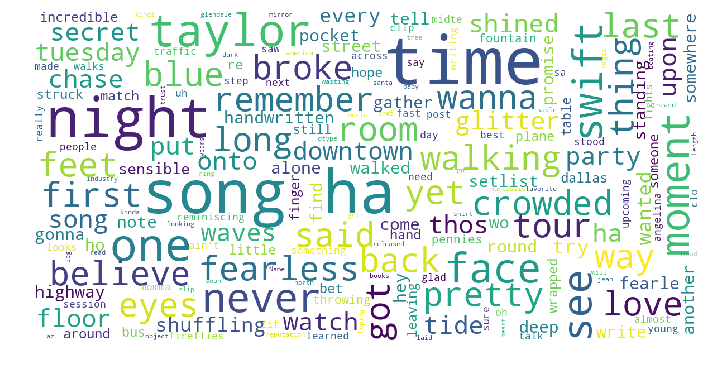

In [25]:

data=pd.read_csv('TS.csv',index_col=0)
show_wordcloud(data.lyrics)

In [46]:
cleaned=data[data.lyrics.notna()]
w_taylor=cleaned[cleaned.lyrics.str.contains('Taylor')]

In [53]:
cleaned_ly = clean_lyrics(w_taylor.lyrics)
cleaned_ly

2       and all at once, you are the one i have been ...
16      i promise that you'll never find another like...
45     here's to the tour that taught me that your re...
56     2007 "tim mcgraw"  2008 "our song" "teardrops ...
59      no sir well, i don't wanna be the blame, not ...
66      i was thinking 'bout her, thinking 'bout me t...
90      oh whoa oh whoa oh whoa   you know you love m...
98      (you good to go?)   all i knew this morning w...
112     knew he was a killer first time that i saw hi...
122     find myself at your door just like all those ...
130     i like glitter and sparkly dresses but i'm no...
133     it feels like a perfect night to dress up lik...
136     i remember tears streaming down your face whe...
151     took a deep breath in the mirror he didn't li...
173     knew he was a killer first time that i saw hi...
175     ‘cause, baby, now we've got bad blood you kno...
178     find myself at your door just like all those ...
190     i wanna be your end gam

In [68]:
list(cleaned_ly.index)

[2,
 16,
 45,
 56,
 59,
 66,
 90,
 98,
 112,
 122,
 130,
 133,
 136,
 151,
 173,
 175,
 178,
 190,
 208,
 215,
 225,
 229,
 265,
 319]

In [70]:
w_taylor.ix[list(cleaned_ly.index)]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,album,image,lyrics,title,year
2,NaN,https://images.genius.com/ae7c9cd43bc34b7c3414...,"[Chorus]\nAnd all at once, you are the one I h...",The Making Of A Song - 'King of My Heart',NaN
16,TS7*,https://images.genius.com/6a69d583d0d2f5cbeece...,[Intro: Taylor Swift]\nI promise that you'll n...,ME!,2019-04-26
45,Taylor Swift,https://images.genius.com/407887c2a6f6e60304b6...,Here's to the tour that taught me that your re...,Reputation Tour Book Intro,2018-06-02
56,NaN,https://images.genius.com/845fdd798a42745c659e...,"2007\n""Tim McGraw""\n\n2008\n""Our Song""\n""Teard...",Hot 100 Chart History,NaN
59,Covers,https://images.genius.com/ae7c9cd43bc34b7c3414...,"[Verse 1: Hayley Williams]\nNo sir\nWell, I do...",That's What You Get,2011-09-16
66,NaN,https://images.genius.com/ae7c9cd43bc34b7c3414...,[Hook: Nelly and Taylor Swift]\nI was thinking...,Just A Dream,2011-11-05
90,NaN,https://images.genius.com/ae7c9cd43bc34b7c3414...,[Intro: Justin Bieber]\nOh whoa\nOh whoa\nOh w...,Baby,2011-08-23
98,Red,https://images.genius.com/ca73e9144e0d43efda2d...,[Intro: Ed Sheeran]\n(You good to go?)\n\n[Ver...,Everything Has Changed,2012-10-22
112,reputation,https://images.genius.com/5aeff71a5f148ca52f0b...,[Verse 1]\nKnew he was a killer first time tha...,...Ready for It?,2017-09-03
122,NaN,https://images.genius.com/c75babe2b330b5ce3da2...,[Verse 1: Gary Lightbody]\nFind myself at your...,The Last Time (VEVO Version),2013-11-15


In [64]:
cleaned_ly

2       and all at once, you are the one i have been ...
16      i promise that you'll never find another like...
45     here's to the tour that taught me that your re...
56     2007 "tim mcgraw"  2008 "our song" "teardrops ...
59      no sir well, i don't wanna be the blame, not ...
66      i was thinking 'bout her, thinking 'bout me t...
90      oh whoa oh whoa oh whoa   you know you love m...
98      (you good to go?)   all i knew this morning w...
112     knew he was a killer first time that i saw hi...
122     find myself at your door just like all those ...
130     i like glitter and sparkly dresses but i'm no...
133     it feels like a perfect night to dress up lik...
136     i remember tears streaming down your face whe...
151     took a deep breath in the mirror he didn't li...
173     knew he was a killer first time that i saw hi...
175     ‘cause, baby, now we've got bad blood you kno...
178     find myself at your door just like all those ...
190     i wanna be your end gam

In [34]:
cleaned_data=data.dropna(subset=['lyrics'])
cleaned_data[(data.lyrics.str.contains('taylor'))]

ValueError: cannot index with vector containing NA / NaN values

In [30]:
clean_lyric

,album,image,lyrics,title,year
0,reputation,https://images.genius.com/5c8131af7d5d20f3c8f2...,[Verse 1]\nOur secret moments in a crowded roo...,Dress,2017-11-10
1,reputation,https://images.genius.com/5c8131af7d5d20f3c8f2...,[Verse 1]\nThere's glitter on the floor after ...,New Year's Day,2017-11-10
2,NaN,https://images.genius.com/ae7c9cd43bc34b7c3414...,"[Chorus]\nAnd all at once, you are the one I h...",The Making Of A Song - 'King of My Heart',NaN
3,Unreleased Songs,https://images.genius.com/ae7c9cd43bc34b7c3414...,\n Lyrics for this song h...,Wonderful Things*,NaN
4,NaN,https://images.genius.com/a4b0cfd9dcd67b54afe6...,[Verse 1]\nYou said the way my blue eyes shine...,Tim McGraw (Demo),NaN
5,Fearless (Platinum Edition),https://images.genius.com/58b77c98b2bf91fe599d...,"[Verse 1]\nOnce upon a time, I believe it was ...",Forever & Always (Piano Version),2008-11-11
6,"""Taylor's Songs"" 2003 Demo",https://images.genius.com/a5d1a45a54710b74f28a...,[Verse 1]\nLet's watch the tide chase the wave...,Smokey Black Nights,NaN
7,Vol. 2 Demo CD,https://images.genius.com/60c43c75d3b472c686a3...,[Verse 1]\nWalking downtown shuffling my feet\...,This Here Guitar,NaN
8,NaN,https://images.genius.com/b3a1401dee1819ccb104...,[Verse 1]\nI like the way you wanted me\nEvery...,"Baby, Don't You Break My Heart Slow",NaN
9,Red,https://images.genius.com/c84af279c97927e0c3cd...,"[Verse 1]\nLong handwritten note, deep in your...",Sad Beautiful Tragic,2012-10-22
